In [39]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
pip install hvplot

In [41]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [42]:
ls sample_data/


anscombe.json*               california_housing_train.csv  mnist_train_small.csv
california_housing_test.csv  mnist_test.csv                README.md*


In [43]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("/content/drive/MyDrive/Crypto/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [44]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [45]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
scaled_data = scaler.fit_transform(market_data_df[['price_change_percentage_24h', 'price_change_percentage_7d', 'price_change_percentage_14d', 'price_change_percentage_30d', 'price_change_percentage_60d', 'price_change_percentage_200d', 'price_change_percentage_1y']])

In [46]:
# Create a DataFrame with the scaled data
scaled_data_df = pd.DataFrame(scaled_data, columns=['price_change_percentage_24h', 'price_change_percentage_7d', 'price_change_percentage_14d', 'price_change_percentage_30d', 'price_change_percentage_60d', 'price_change_percentage_200d', 'price_change_percentage_1y'], index=market_data_df.index)
# Display sample data


# Copy the crypto names from the original data
# Copy the crypto names from the original data
scaled_data_df['coinid'] = market_data_df.index

# Set the coinid column as index
# Set the coinid column as index
scaled_data_df = scaled_data_df.set_index('coinid')

# Display sample data
scaled_data_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coinid,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [47]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = list(range(1, 11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(scaled_data_df)
    inertia.append(k_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
df_elbow.head()

,k,inertia
0,1,287.000000
1,2,212.123342
2,3,165.136752
3,4,79.022435
4,5,66.413051


<Axes: xlabel='k'>

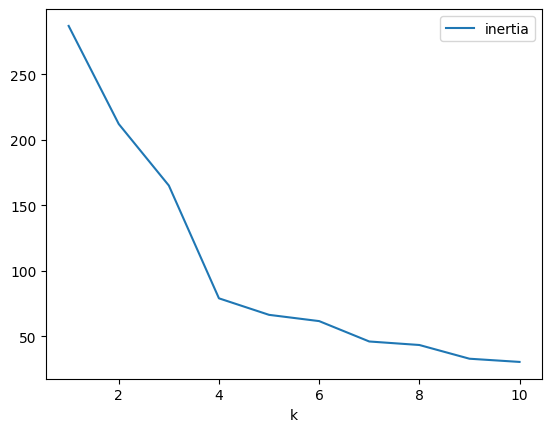

In [48]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
df_elbow.plot.line(x="k", y="inertia")

#### Answer the following question:
**Question:** What is the best value for `k`?

**Answer:** Four is the best value for "k".

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [49]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=1)

In [50]:
# Fit the K-Means model using the scaled data
model.fit(scaled_data_df)

KMeans(n_clusters=4, random_state=1)

In [51]:
# Predict the clusters to group the cryptocurrencies using the scaled data
crypto_clusters = model.predict(scaled_data_df)

# View the resulting array of cluster values.
crypto_clusters

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0],
      dtype=int32)

In [52]:
# Create a copy of the DataFrame
predictions_df = scaled_data_df.copy()

In [53]:
# Add a new column to the DataFrame with the predicted clusters
predictions_df["crypto_cluster"] = crypto_clusters

# Display sample data
predictions_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,crypto_cluster
coinid,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

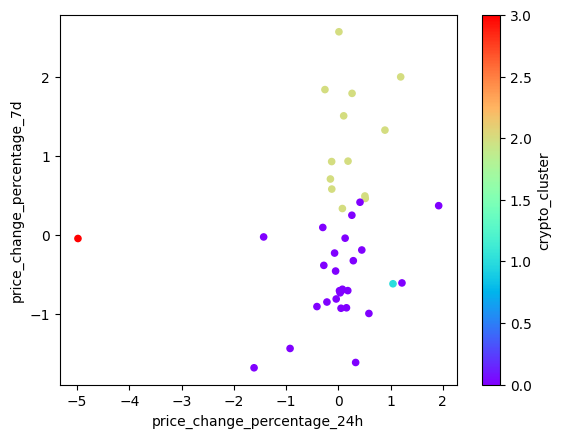

In [54]:
# Create a scatter plot using Pandas plot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
predictions_df.plot.scatter(x="price_change_percentage_24h", y="price_change_percentage_7d", c="crypto_cluster", colormap="rainbow")

### Optimize Clusters with Principal Component Analysis.

In [55]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [56]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
crypto_pca = pca.fit_transform(scaled_data_df)

# View the first five rows of the DataFrame.
crypto_pca[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [57]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

In [58]:
total_explained_variance = sum(pca.explained_variance_ratio_)
print(f"Total Explained Variance: {total_explained_variance}")

Total Explained Variance: 0.895031657030984


#### Answer the following question:

**Question:** What is the total explained variance of the three principal components?

**Answer:**Total Explained Variance: 0.895031657030984



In [59]:
# Creating a DataFrame with the PCA data
pca_df = pd.DataFrame(
    data=crypto_pca, columns=["PCA1", "PCA2", "PCA3"], index=scaled_data_df.index
)
# Copy the crypto names from the original data
pca_df["coinid"] = scaled_data_df.index
# Set the coinid column as index
pca_df = pca_df.set_index('coinid')
# Display sample data
pca_df.head()

,PCA1,PCA2,PCA3
coinid,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


### Find the Best Value for k Using the PCA Data

<Axes: xlabel='k'>

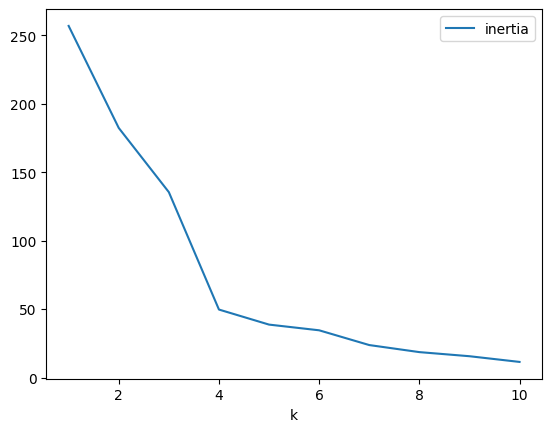

In [60]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = list(range(1, 11))
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the PCA data
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(pca_df)
    inertia.append(k_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_data_pca)

# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
df_elbow_pca.plot.line(x="k", y="inertia")

<Axes: xlabel='k'>

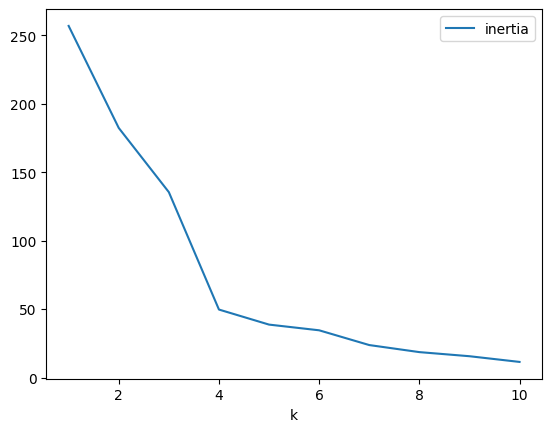

In [61]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
df_elbow_pca.plot.line(x="k", y="inertia")

#### Answer the following questions:
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value for "k" when using the PCA data is "4".


* **Question:** Does it differ from the best k value found using the original data? No

  * **Answer:**

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [62]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=0)

In [63]:
# Fit the K-Means model using the PCA data
model.fit(pca_df)

KMeans(n_clusters=4, random_state=0)

In [64]:
# Predict the clusters to group the cryptocurrencies using the PCA data
clusters_pca = model.predict(pca_df)

# Print the resulting array of cluster values.


In [65]:
# Create a copy of the DataFrame with the PCA data
clustered_pca_df = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
clustered_pca_df["pca_cluster"] = clusters_pca

# Display sample data


In [66]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`.
clustered_pca_df.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    by="pca_cluster",  # Color points by cluster assignments
    hover_cols=["coinid"],  # Display coinid on hover
    title="Cryptocurrency Clusters (PCA)" )
# Set plot title
# Color the graph points with the labels found using K-Means and
# add the country name in the `hover_cols` parameter to identify

:NdOverlay   [pca_cluster]
   :Scatter   [PCA1]   (PCA2,coinid)

### Determine the Weights of Each Feature on each Principal Component

In [71]:
clustered_pca_df.head()

,PCA1,PCA2,PCA3,pca_cluster
coinid,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


In [73]:
# Use the columns from the original scaled DataFrame as the index.
weights = pd.DataFrame(data=model.cluster_centers_, columns=pca_df.columns)

# Display sample data
weights

,PCA1,PCA2,PCA3
0,-0.240076,-0.534028,-0.595750
1,8.089018,-3.896891,2.301382
2,-0.510727,0.847226,1.167315
3,4.792395,6.767679,-1.986985


#### Answer the following question:

* **Question:** Which features have the strongest positive or negative influence on each component?

* **Answer:**The feature with the strongest positvie effect is PCA1.  The feature with the strongest negative influence is PCA2.
    